# Exercise 1

We first load a dataset and examine its dimensions.

In [ ]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)


(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

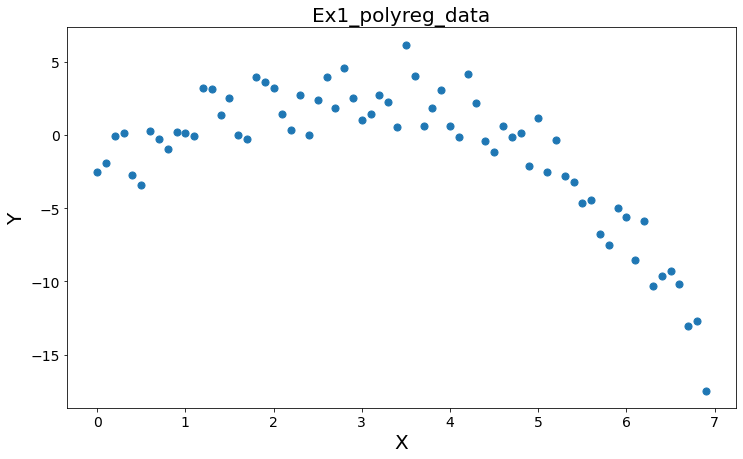

In [7]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
x = xy_data[:,0]      # First column of array (indexed by 0) contains the x 
y = xy_data[:,1]  # Second column of array (indexed by 1) contains the y


# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, s=50)   # s can be used to adjust the size of the dots
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ex1_polyreg_data')

plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [12]:
all_ones = np.ones(np.shape(x))

# Create matrix X which contains all ones in first column, and dates in the second
X  = np.column_stack((all_ones, x))

#Let us check the dimensions of X
print('The dimensions of X are',np.shape(X))

# Defining the y vector
yvalues = y

XT = X.T  # transpose
beta_lin = np.linalg.inv(XT.dot(X)).dot(XT.dot(yvalues))

# Print the coefficient vector, rounding the output to 3 decimal places
print('Regression coefficients: beta_0 =', np.round(beta_lin[0], decimals =3), 
      '\t beta_1 = ', np.round(beta_lin[1], decimals =3)) 

The dimensions of X are (70, 2)
Regression coefficients: beta_0 = 3.799 	 beta_1 =  -1.441


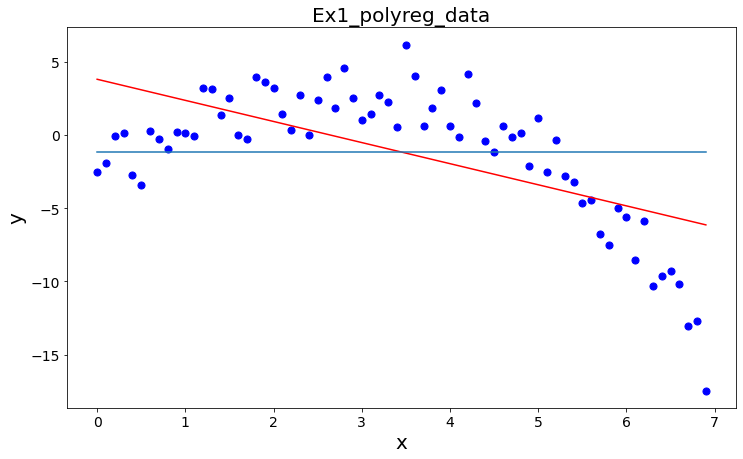

SSE_0 =  1532.27  	 MSE_0 =  21.89
SSE_1 =  938.76  	 MSE_1 =  13.41


In [13]:
# Computing the fit of the model
fit_lin = X.dot(beta_lin)   

# Fit of zeroth-order model (mean of y)
fit_0 = np.mean(yvalues)*all_ones 

plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(x, y, s=50, color ='blue')   # s can be used to adjust the size of the dots
plt.plot(x, fit_lin, color = 'red')
plt.plot(x, fit_0)  
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ex1_polyreg_data')
plt.show()

#We now compute the sum of squared errors and the MSE
SSE_0 = np.linalg.norm(yvalues - fit_0)**2
MSE_0 = SSE_0/(np.size(yvalues))

SSE_1 = np.linalg.norm(yvalues - fit_lin)**2
MSE_1 = SSE_1/(np.size(yvalues))

print('SSE_0 = ', np.round_(SSE_0, 2), ' \t MSE_0 = ', np.round_(MSE_0, 2))  
print('SSE_1 = ', np.round_(SSE_1, 2), ' \t MSE_1 = ', np.round_(MSE_1, 2) )

In [27]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    x = data_matrix[:,0]
    y = data_matrix[:,1]
    all_ones = np.ones(np.shape(x))
    yvalues = y
    N = np.shape(data_matrix)[0]
    X = all_ones
    
    #Check the dimension of k
    
    #zeroth order
    if k == 0 :
        beta = np.mean(yvalues)
        fit = np.mean(yvalues)*all_ones 
        residual = yvalues - fit
    
    if 0 < k < N:
        for i in range(k):
            X  = np.column_stack((X, x**(i+1)))
        beta = np.linalg.lstsq(X, yvalues, rcond=None)[0]
        fit = X.dot(beta) 
        residual = yvalues - fit
        
    if k >= N:
        for i in range(N-1):
            X  = np.column_stack((X, x**(i+1)))
        beta = np.linalg.lstsq(X, yvalues, rcond=None)[0]
        fit = X.dot(beta) 
        residual = yvalues - fit
        
    return beta, fit, residual

Use the tests below to check the outputs of the function you have written:

In [28]:
# Some tests to make sure your  function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

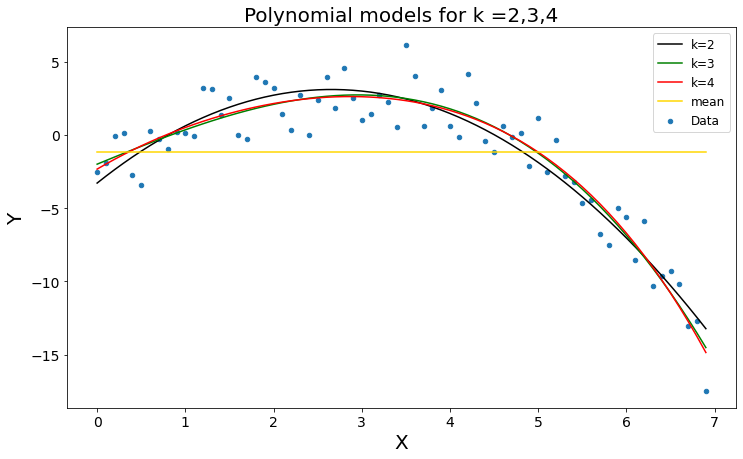

SSE_2 =  172.18  	 MSE_2 =  2.46
SSE_3 =  152.41  	 MSE_3 =  2.18
SSE_4 =  151.23  	 MSE_4 =  2.16
R^2 for k=2 =  0.8876
R^2 for k=3 =  0.9005
R^2 for k=4 =  0.9013


In [33]:
#Your code here
plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(x, y, s=20, label = 'Data')   
plt.plot(x, polyreg(xy_data, 2)[1], color = 'black', label = 'k=2')
plt.plot(x, polyreg(xy_data, 3)[1], color = 'green', label = 'k=3')
plt.plot(x, polyreg(xy_data, 4)[1], color = 'red', label = 'k=4')
plt.plot(x, polyreg(xy_data, 0)[1], color = 'gold', label = 'mean')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial models for k =2,3,4')
plt.legend(fontsize = 'large')

plt.show()

SSE_0 = np.linalg.norm(polyreg(xy_data, 0)[2])**2

SSE_2 = np.linalg.norm(polyreg(xy_data, 2)[2])**2
MSE_2 = SSE_2/(np.size(yvalues))

SSE_3 = np.linalg.norm(polyreg(xy_data, 3)[2])**2
MSE_3 = SSE_3/(np.size(yvalues))

SSE_4 = np.linalg.norm(polyreg(xy_data, 4)[2])**2
MSE_4 = SSE_4/(np.size(yvalues))
print('SSE_2 = ', np.round_(SSE_2, 2), ' \t MSE_2 = ', np.round_(MSE_2, 2))  
print('SSE_3 = ', np.round_(SSE_3, 2), ' \t MSE_3 = ', np.round_(MSE_3, 2))
print('SSE_4 = ', np.round_(SSE_4, 2), ' \t MSE_4 = ', np.round_(MSE_4, 2))
print('R^2 for k=2 = ', np.round_(1- SSE_2/SSE_0, decimals = 4))
print('R^2 for k=3 = ', np.round_(1- SSE_3/SSE_0, decimals = 4))
print('R^2 for k=4 = ', np.round_(1- SSE_4/SSE_0, decimals = 4))

 #### State which model you choose and briefly justify your choice.
 
 

I will choose k=3 model. This is because the reduction in SSE, MSE and R^2 for k>3 is not significant, while larger k means more expensive in calculation.
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

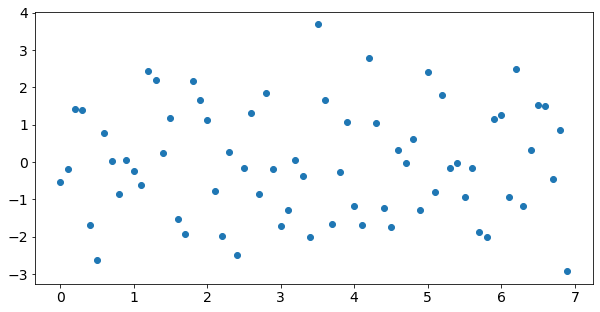

Mean of residuals =  0.0 Variance of residuals =  2.177


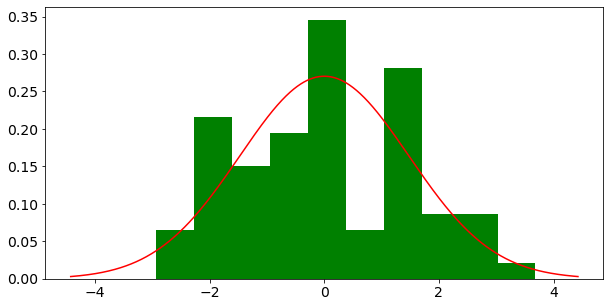

In [41]:
#Your code here
resid_3 = polyreg(xy_data, 3)[2]

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(x, resid_3)
plt.show()

print('Mean of residuals = ', np.round(np.mean(resid_3), 5), 'Variance of residuals = ', 
      np.round(np.var(resid_3), 3))

n, bins, patches = plt.hist(resid_3, bins=10, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm

res_stdev = np.std(resid_3)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()